In [126]:
#importimi i librarive 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import os
%matplotlib inline

#from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import StandardScaler


pd.options.mode.chained_assignment = None  # default='warn'
from datetime import datetime


In [75]:
#importimi i datasetit
hotelbookingDS = pd.read_csv(r"C:\Users\leand\Documents\GitHub\Pergatitja-VizualizimiITeDhenave\hotel_bookings.csv")
#hotelbookingDS = pd.read_csv(r"C:\Users\xonag\Documents\GitHub\Pergatitja-VizualizimiITeDhenave\hotel_bookings.csv")
hotelbookingDS = hotelbookingDS[(hotelbookingDS['is_canceled'] == 1) | (hotelbookingDS['is_canceled'] == 0)]
hotelbookingDS.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [76]:
#Pritnimi i atributeve e datasetit
print(hotelbookingDS.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [77]:
#analiza e vlerave ne dataset
hotelbookingDS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [78]:
#analiza e vlerave unike
print(hotelbookingDS.nunique())

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [79]:
#Marrja e nje monstre nga dataseti
hotelbookingDS.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
27655,Resort Hotel,0,211,2016,September,36,1,1,3,2,0.0,0,BB,NLD,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,100.0,0,2,Check-Out,2016-09-05
109097,City Hotel,0,49,2017,April,14,3,1,3,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.0,0,1,Check-Out,2017-04-07
73600,City Hotel,1,330,2017,August,35,27,2,1,2,2.0,0,BB,ISR,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,199.0,0,1,Canceled,2017-07-24
51092,City Hotel,1,51,2016,May,20,13,2,2,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,140.4,0,0,Canceled,2016-04-08
39887,Resort Hotel,0,26,2017,August,35,27,2,2,1,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,197.0,0,3,Check-Out,2017-08-31
58276,City Hotel,1,111,2016,October,42,10,1,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,234.0,NaN,0,Transient-Party,120.0,0,0,Canceled,2016-10-07
65568,City Hotel,1,373,2017,April,14,5,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,229.0,NaN,0,Transient,90.0,0,0,Canceled,2016-04-17
69765,City Hotel,1,437,2017,June,23,6,0,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,229.0,NaN,0,Transient,90.0,0,0,Canceled,2017-05-05
78222,City Hotel,1,16,2015,October,41,8,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,1,0,A,F,0,No Deposit,14.0,NaN,0,Transient,109.0,0,0,Canceled,2015-10-07
5828,Resort Hotel,1,211,2016,May,20,14,1,1,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,298.0,NaN,0,Transient-Party,85.0,0,0,Canceled,2016-04-12


In [80]:
# Numri i rezervimeve per cdo vit
hotelbookingDS.arrival_date_year.value_counts(ascending = False)

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [81]:
#Anulimi i rezervimeve varesisht nga viti
hotelbookingDS.groupby(['arrival_date_year','is_canceled']).size()

arrival_date_year  is_canceled
2015               0              13854
                   1               8142
2016               0              36370
                   1              20337
2017               0              24942
                   1              15745
dtype: int64

In [82]:
#Anulimi i rezervimeve varesisht nga lloji i hotelit
hotelbookingDS.groupby(['hotel','is_canceled']).size()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
dtype: int64

In [83]:
#Perqindja e anulimit te rezervimeve
canceled_percent = round(hotelbookingDS["is_canceled"].value_counts()/len(hotelbookingDS["is_canceled"])*100,3)
print("Canceled Percent: ")
print(canceled_percent)

Canceled Percent: 
0    62.958
1    37.042
Name: is_canceled, dtype: float64


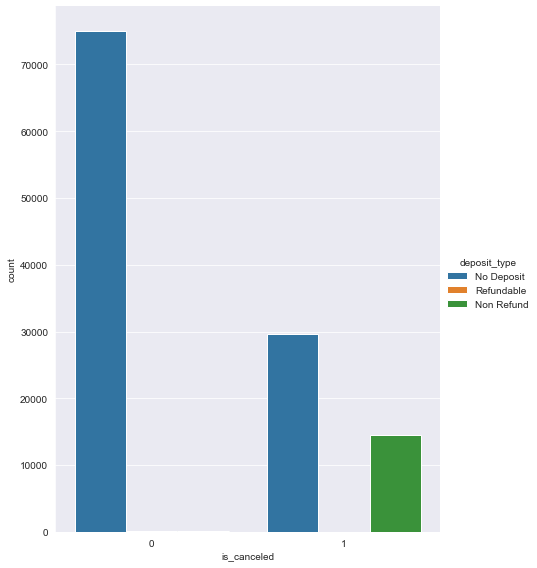

In [84]:
#Ndikimi kerkeses per depozit
sns.set_style('darkgrid')
sns.catplot(x="is_canceled", hue="deposit_type",
                data=hotelbookingDS, kind="count",
                height=8, aspect=.8)

In [85]:
#Renditja e shteteve ne varesi te numrit me te madh te anulimit te rezervimit
hotelbookingDS.country.value_counts(ascending = False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [87]:
def replace_customer_type(x):
    if x=='Transient':
        return 0
    elif x=='Contract':
        return 1
    elif x=='Transient-Party':
        return 2
    elif x=='Group':
        return 3

hotelbookingDS['customer_type']=hotelbookingDS['customer_type'].apply(replace_customer_type) 

In [88]:
hotelbookingDS.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,0,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,0,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,0,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,0,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,0,98.0,0,1,Check-Out,2015-07-03


In [89]:
def replace_market_segment(x):
    if x=='Direct':
        return 0
    elif x=='Corporate':
        return 1
    elif x=='Online TA':
        return 2
    elif x=='Offline TA/TO':
        return 3
    elif x=='Aviation':
        return 4
    elif x=='Groups':
        return 5
    elif x=='Complementary':
        return 6
    elif x=='Undefined':
        return 7
 

hotelbookingDS['market_segment']=hotelbookingDS['market_segment'].apply(replace_market_segment) 

In [90]:
hotelbookingDS.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,0,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,0,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,0,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,0,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,0,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,0,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,1,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,0,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,2,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,0,98.0,0,1,Check-Out,2015-07-03


In [91]:
#I largojme kolonat rezervation_status sepse eshte e dhena e ngjajshme
#me is canceled dhe rezervation status date sepse nuk ka ndikon
hotelbookingDS.drop(['reservation_status','reservation_status_date','agent','company'],axis=1,inplace=True)
hotelbookingDS.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,0,Direct,0,0,0,C,C,3,No Deposit,0,0,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,0,Direct,0,0,0,C,C,4,No Deposit,0,0,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,0,Direct,0,0,0,A,C,0,No Deposit,0,0,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,1,Corporate,0,0,0,A,A,0,No Deposit,0,0,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,2,TA/TO,0,0,0,A,A,0,No Deposit,0,0,98.0,0,1


In [92]:
#Shikimi i vlerave null
hotelbookingDS.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [93]:
#Largimi i vlerave null
hotelbookingDS.dropna(inplace=True)

In [94]:
#Shikimi i vlerave null
hotelbookingDS.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [95]:
from sklearn.ensemble import IsolationForest

In [96]:
OUTDClf = IsolationForest(n_estimators = 10)


In [97]:
pd.set_option('display.max_columns', None)


In [98]:
hotelbookingDS.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,0,Direct,0,0,0,C,C,3,No Deposit,0,0,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,0,Direct,0,0,0,C,C,4,No Deposit,0,0,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,0,Direct,0,0,0,A,C,0,No Deposit,0,0,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,1,Corporate,0,0,0,A,A,0,No Deposit,0,0,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,2,TA/TO,0,0,0,A,A,0,No Deposit,0,0,98.0,0,1


In [99]:
hotelbookingDS.drop(['hotel','arrival_date_month','meal','country','distribution_channel','reserved_room_type','assigned_room_type','deposit_type'],axis=1,inplace=True)


In [100]:
OUTDClf.fit(hotelbookingDS)

IsolationForest(n_estimators=10)

In [101]:
hotelbookingDS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118898 non-null  int64  
 1   lead_time                       118898 non-null  int64  
 2   arrival_date_year               118898 non-null  int64  
 3   arrival_date_week_number        118898 non-null  int64  
 4   arrival_date_day_of_month       118898 non-null  int64  
 5   stays_in_weekend_nights         118898 non-null  int64  
 6   stays_in_week_nights            118898 non-null  int64  
 7   adults                          118898 non-null  int64  
 8   children                        118898 non-null  float64
 9   babies                          118898 non-null  int64  
 10  market_segment                  118898 non-null  int64  
 11  is_repeated_guest               118898 non-null  int64  
 12  previous_cancell

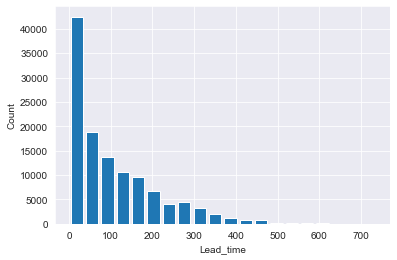

In [102]:
# MENJANIMI I OUTLIER permes teknikes percentile duke perdour [0.001, 0.999] si lower and upper bound percentiles

plt.hist(hotelbookingDS.lead_time, bins=20, rwidth=0.8)
plt.xlabel('Lead_time')
plt.ylabel('Count')
plt.show()

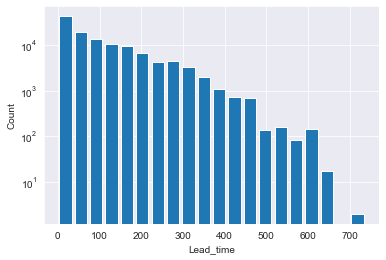

In [103]:
plt.hist(hotelbookingDS.lead_time, bins=20, rwidth=0.8)
plt.xlabel('Lead_time')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [104]:
lower_limit, upper_limit = hotelbookingDS.lead_time.quantile([0.001, 0.999])
lower_limit, upper_limit

(0.0, 605.0)

In [105]:
outliers = hotelbookingDS[(hotelbookingDS.lead_time>upper_limit) | (hotelbookingDS.lead_time<lower_limit)]
outliers.sample(10)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
60231,1,626,2016,46,7,1,2,2,0.0,0,5,0,0,0,0,0,0,62.8,0,0
60222,1,626,2016,46,7,1,2,2,0.0,0,5,0,0,0,0,0,0,62.8,0,0
65044,1,622,2017,12,23,0,2,2,0.0,0,5,0,0,0,0,0,0,62.0,0,0
65039,1,622,2017,12,23,0,2,2,0.0,0,5,0,0,0,0,0,0,62.0,0,0
65046,1,622,2017,12,23,0,2,2,0.0,0,5,0,0,0,0,0,0,62.0,0,0
64772,1,615,2017,11,16,0,2,2,0.0,0,5,0,0,0,0,0,0,62.0,0,0
60246,1,626,2016,46,7,1,2,2,0.0,0,5,0,0,0,0,0,0,62.8,0,0
64778,1,615,2017,11,16,0,2,2,0.0,0,5,0,0,0,0,0,0,62.0,0,0
60371,1,626,2016,46,7,1,2,2,0.0,0,5,0,0,0,0,0,0,62.8,0,0
64413,1,608,2017,10,9,0,2,2,0.0,0,5,0,0,0,0,0,0,62.0,0,0


In [106]:
hotelbookingDS2 = hotelbookingDS[(hotelbookingDS.lead_time<upper_limit) & (hotelbookingDS.lead_time>lower_limit)]
hotelbookingDS2.shape

(112545, 20)

In [107]:
hotelbookingDS.shape


(118898, 20)

In [108]:
hotelbookingDS.shape[0] - hotelbookingDS2.shape[0]

6353

In [109]:
import seaborn as sns


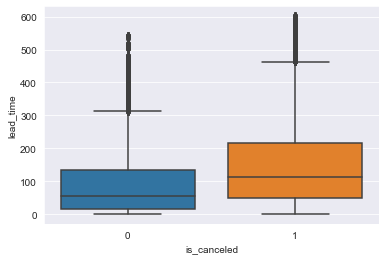

In [110]:
sns.boxplot(x='is_canceled',y='lead_time',data=hotelbookingDS2)
plt.show()


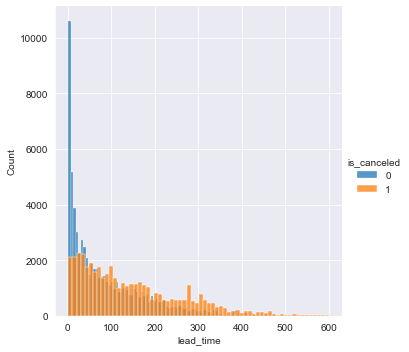

In [111]:
sns.FacetGrid(hotelbookingDS2,hue='is_canceled',height=5).map(sns.histplot,"lead_time").add_legend()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


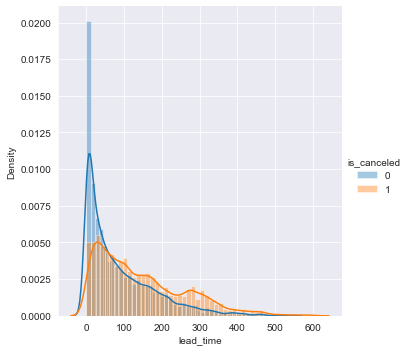

In [112]:
sns.FacetGrid(hotelbookingDS2,hue='is_canceled',height=5).map(sns.distplot,"lead_time").add_legend()


In [113]:
hotelbookingDS2.to_csv("hotelbookingDS-Processed.csv")

In [114]:
hotelbookingDS2.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
market_segment                      int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

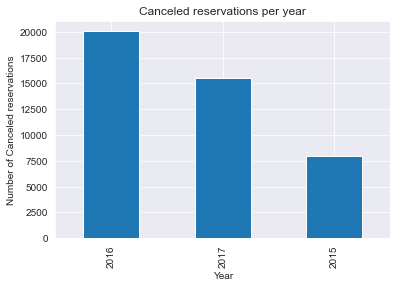

In [115]:
#Anulimi i rezervimeve sipas viteve te paraqitura grafikisht
c_year = hotelbookingDS2['is_canceled'].groupby(hotelbookingDS2['arrival_date_year'])
canceled = c_year.sum().sort_values(ascending=False)


ax = canceled.plot(kind="bar")
ax.set_title("Canceled reservations per year")
ax.set_ylabel("Number of Canceled reservations")
ax.set_xlabel("Year")
vals = ax.get_yticks()

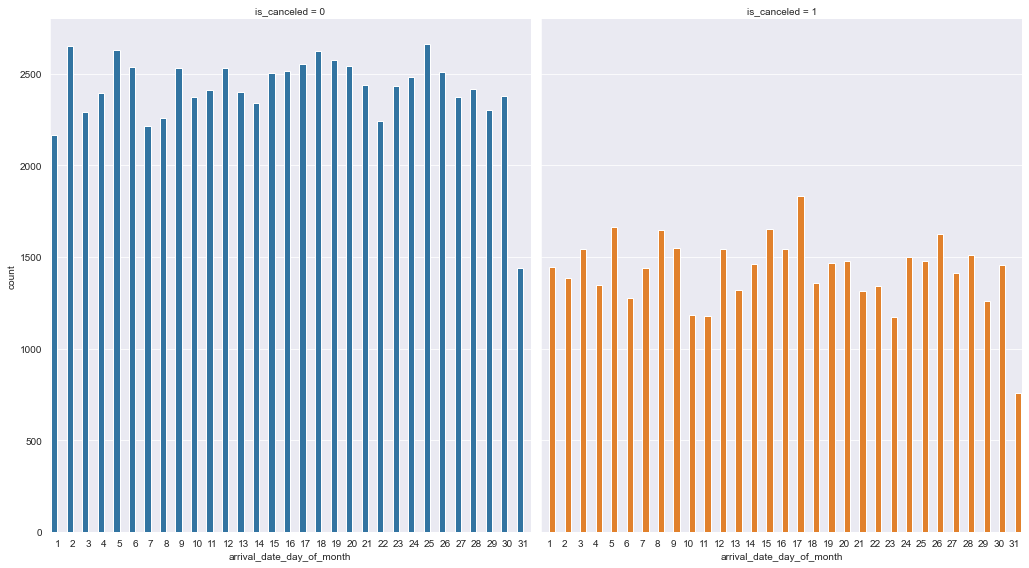

In [116]:

sns.catplot(x="arrival_date_day_of_month",hue="is_canceled",col="is_canceled"
            ,data=hotelbookingDS,kind="count",height=8,aspect=.9);

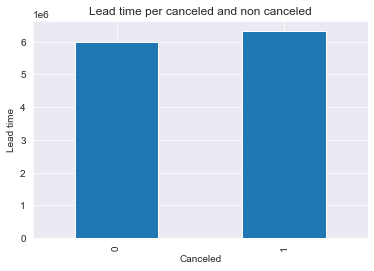

In [119]:
#Lead time per canceled and non canceled 
n_lead_time= hotelbookingDS2['lead_time'].groupby(hotelbookingDS2['is_canceled'])
lead_time = n_lead_time.sum().sort_values(ascending=True)


ax = lead_time.plot(kind="bar")
ax.set_title("Lead time per canceled and non canceled")
ax.set_ylabel("Lead time")
ax.set_xlabel("Canceled")
vals = ax.get_yticks()

Text(0.5, 0, 'total_of_special_requests')

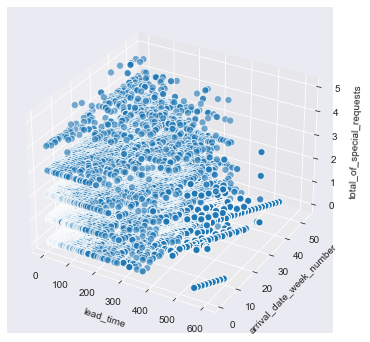

In [122]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = hotelbookingDS2['lead_time']
ys = hotelbookingDS2['arrival_date_week_number']
zs = hotelbookingDS2['total_of_special_requests']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('lead_time')
ax.set_ylabel('arrival_date_week_number')
ax.set_zlabel('total_of_special_requests')